In [126]:
import numpy as np
import pandas as pd
import string
import spacy
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline


### Reading data

In [127]:
elon=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\text mining\\Elon_musk.csv",encoding='unicode_escape')

In [128]:
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Stripping the reviews of spaces before and after the text.

In [129]:
elon_musk = [x.strip() for x in elon.Text]
elon_musk = [x for x in elon_musk if x]
elon_musk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [130]:
import spacy

In [131]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Govind
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Getting sentences

In [132]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(elon_musk))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

### Making the data into a dataframe

In [133]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


### Getting the negative words affinity values
### Putting affinity to be -1 for all the words

In [134]:
afinn_n = pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\text mining\\negative-words.txt",sep=';', encoding='latin-1')
afinn_n.shape

(4816, 79)

In [135]:
afinn_n

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Opinion Lexicon: Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,This file contains a list of NEGATIVE opinion...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,zaps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,zealot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,zealous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4814,zealously,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
afinn_n=afinn_n.iloc[:,0]

In [137]:
afinn_n

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4811         zaps
4812       zealot
4813      zealous
4814    zealously
4815       zombie
Name: Unnamed: 0, Length: 4816, dtype: object

In [138]:
afinn_n.dropna(inplace=True)

In [139]:
afinn_n

33         2-faced
34         2-faces
35        abnormal
36         abolish
37      abominable
           ...    
4811          zaps
4812        zealot
4813       zealous
4814     zealously
4815        zombie
Name: Unnamed: 0, Length: 4783, dtype: object

In [140]:
afinn_n=afinn_n.reset_index()

In [141]:
afinn_n

,index,Unnamed: 0
0,33,2-faced
1,34,2-faces
2,35,abnormal
3,36,abolish
4,37,abominable
...,...,...
4778,4811,zaps
4779,4812,zealot
4780,4813,zealous
4781,4814,zealously


In [142]:
afinn_n['value']=-1

In [143]:
afinn_n

,index,Unnamed: 0,value
0,33,2-faced,-1
1,34,2-faces,-1
2,35,abnormal,-1
3,36,abolish,-1
4,37,abominable,-1
...,...,...,...
4778,4811,zaps,-1
4779,4812,zealot,-1
4780,4813,zealous,-1
4781,4814,zealously,-1


In [144]:
afinn_n.drop(['index'],axis=1,inplace=True)

In [145]:
afinn_n

,Unnamed: 0,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [146]:
afinn_n.columns=['words','value']

In [147]:
afinn_p = pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\text mining\\positive-words.txt",sep=';', encoding='latin-1')
afinn_p.shape

(2039, 77)

### Getting the positive words affinity values
### Putting affinity to be -1 for all the words

In [148]:
afinn_p=afinn_p.iloc[:,0]
afinn_p.dropna(inplace=True)
afinn_p=afinn_p.reset_index()
afinn_p['value']=1
afinn_p.drop(['index'],axis=1,inplace=True)
afinn_p.columns=['words','value']
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [149]:
afinn_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [150]:
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


### Concatinating the dataframes to get an affinity dataframe

In [151]:
afinn=pd.concat([afinn_n,afinn_p],ignore_index=True)

In [152]:
afinn

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
6784,youthful,1
6785,zeal,1
6786,zenith,1
6787,zest,1


In [153]:
affinity_scores = afinn.set_index('words')['value'].to_dict()

In [154]:
affinity_scores

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

### Defining a function to calculate sentiment

In [155]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

### Calculating sentiment

In [156]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [157]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,1
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-1
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0


### Data with sentiment value less than 2

In [158]:
sent_df[sent_df.sentiment_value<-2]

,sentence,sentiment_value
156,We couldnt get everything done in https://t....,-3
363,4D is essential for dynamically occluded objec...,-3
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5
886,This is primarily an electrical/electronic (ch...,-3


### Data with sentiment value greater than 5

In [159]:
sent_df[sent_df.sentiment_value>5]

,sentence,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7
105,@Erdayastronaut @SpaceX Was also thinking that...,6
123,It isnt enough to be safer than human drivers...,6
652,"Its not useful for predicting the future, nor...",9


### Finding the word count of sentences

In [160]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head(10)

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,1,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-1,14
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,1,10
8,Tweets definitely do not represent real-world ...,0,8
9,The most entertaining outcome is the most like...,0,109


In [161]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
348,I strive to ensure that the companies enable ...,4,22
580,"T https://t.co/DyNlT5EKGk @Model3Owners Fine,...",4,37
371,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,5,65
299,It was designed from the beginning with human ...,5,64
569,@WholeMarsBlog Haha true @oneandonlyheady Mayb...,5,68
719,We just havent observed the https://t.co/mez...,5,72
123,It isnt enough to be safer than human drivers...,6,51
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231
652,"Its not useful for predicting the future, nor...",9,118


In [162]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.450216
std        1.245016
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [163]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6


### Plotting the sentiment value

<AxesSubplot:ylabel='sentiment_value'>

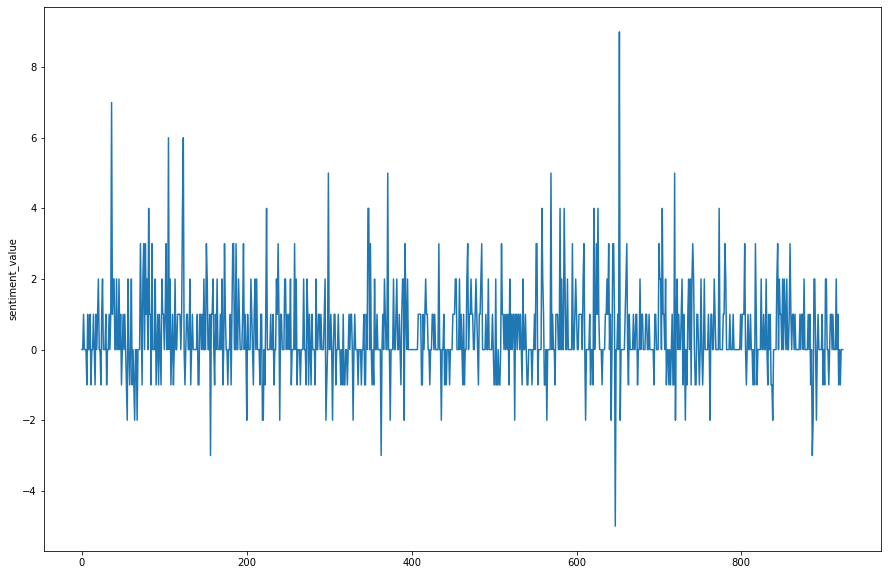

In [164]:
plt.figure(figsize=(15, 10))
sns.lineplot(y=sent_df['sentiment_value'],x=sent_df.index)

### Plotting the scatterplot of sentiment value vs word count

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

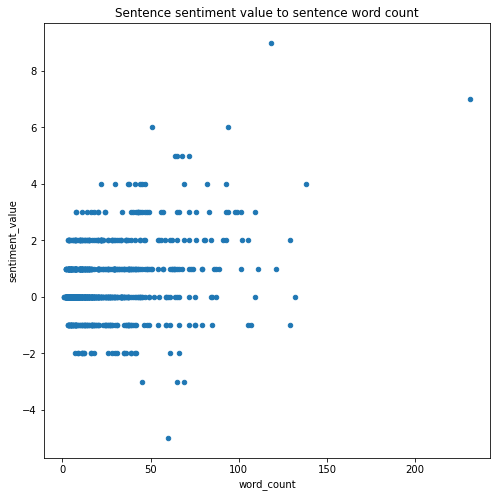

In [125]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), 
                     title='Sentence sentiment value to sentence word count')